<a href="https://colab.research.google.com/github/joaopaulof19/precipitacao_natal/blob/main/dadosINMET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carregamento dos dados de Natal**

In [225]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [227]:
lista_arquivos = []
for arquivo in glob.glob(r'/content/drive/MyDrive/notebooks/inmet-natal/*CSV'):
  if arquivo not in lista_arquivos:
    lista_arquivos.append(arquivo)


In [228]:
lista_arquivos.sort()
lista_arquivos

['/content/drive/MyDrive/notebooks/inmet-natal/INMET_NE_RN_A304_NATAL_01-01-2011_A_31-12-2011.CSV',
 '/content/drive/MyDrive/notebooks/inmet-natal/INMET_NE_RN_A304_NATAL_01-01-2012_A_31-12-2012.CSV',
 '/content/drive/MyDrive/notebooks/inmet-natal/INMET_NE_RN_A304_NATAL_01-01-2013_A_31-12-2013.CSV',
 '/content/drive/MyDrive/notebooks/inmet-natal/INMET_NE_RN_A304_NATAL_01-01-2014_A_31-12-2014.CSV',
 '/content/drive/MyDrive/notebooks/inmet-natal/INMET_NE_RN_A304_NATAL_01-01-2015_A_31-12-2015.CSV',
 '/content/drive/MyDrive/notebooks/inmet-natal/INMET_NE_RN_A304_NATAL_01-01-2016_A_31-12-2016.CSV',
 '/content/drive/MyDrive/notebooks/inmet-natal/INMET_NE_RN_A304_NATAL_01-01-2017_A_31-12-2017.CSV',
 '/content/drive/MyDrive/notebooks/inmet-natal/INMET_NE_RN_A304_NATAL_01-01-2018_A_31-12-2018.CSV',
 '/content/drive/MyDrive/notebooks/inmet-natal/INMET_NE_RN_A304_NATAL_01-01-2019_A_31-12-2019.CSV',
 '/content/drive/MyDrive/notebooks/inmet-natal/INMET_NE_RN_A304_NATAL_01-01-2020_A_31-12-2020.CSV',


In [229]:
# concatenando as bases de dados para cada ano
dados_natal = pd.concat((pd.read_csv(ano, sep=';',encoding='latin-1',on_bad_lines='skip',skiprows=9, decimal=',', header=None) for ano in lista_arquivos), ignore_index=True )


**Deixando a base de dados somente com os atributos de interesse**

In [230]:
# deixa todos os registros e os tres primeiros atributos
dados_natal = dados_natal.iloc[0: , 0:3]

In [231]:
# adicionando o nome das colunas no dataframe
dados_natal.columns=["data", "hora", "precipitacao"]
dados_natal

,data,hora,precipitacao
0,2011-01-01,00:00,0.0
1,2011-01-01,01:00,0.0
2,2011-01-01,02:00,0.0
3,2011-01-01,03:00,0.4
4,2011-01-01,04:00,0.0
...,...,...,...
99307,2022/04/30,1900 UTC,0.0
99308,2022/04/30,2000 UTC,0.0
99309,2022/04/30,2100 UTC,0.0
99310,2022/04/30,2200 UTC,0.0


In [232]:
dados_natal['data'] = pd.to_datetime(dados_natal['data'])

In [233]:
dados_natal.dtypes

data            datetime64[ns]
hora                    object
precipitacao           float64
dtype: object

# **Análise exploratória**

**Visualizando a base que foi importada e o seu tamanho**

In [234]:
display(dados_natal)

,data,hora,precipitacao
0,2011-01-01,00:00,0.0
1,2011-01-01,01:00,0.0
2,2011-01-01,02:00,0.0
3,2011-01-01,03:00,0.4
4,2011-01-01,04:00,0.0
...,...,...,...
99307,2022-04-30,1900 UTC,0.0
99308,2022-04-30,2000 UTC,0.0
99309,2022-04-30,2100 UTC,0.0
99310,2022-04-30,2200 UTC,0.0


**Descobrindo o período da análise**


In [235]:
inicio = pd.to_datetime(dados_natal['data']).dt.date.min()
fim = pd.to_datetime(dados_natal['data']).dt.date.max()

print(f'Inicio: {inicio}')
print(f'Fim: {fim}')

Inicio: 2011-01-01
Fim: 2022-04-30


**Verificando os valores nulos e tipo de dados**

In [236]:
# pd.concat((pd.read_csv(ano, sep=';',encoding='latin-1',on_bad_lines='skip',skiprows=8, decimal=',')
# Foi adicionado o atributo [decimal=','] no [pd.red_csv] para assumir valores com "," como decimal, 
# pois antes vieram todos como string, dificultando a conversão para float64
# 
 
dados_natal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99312 entries, 0 to 99311
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data          99312 non-null  datetime64[ns]
 1   hora          99312 non-null  object        
 2   precipitacao  91613 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.3+ MB


**Verificando a existência de valores nulos**

In [237]:
dados_natal.isnull().sum()

data               0
hora               0
precipitacao    7699
dtype: int64

**Analisando informações estatisticas**

In [238]:
dados_natal.describe()

,precipitacao
count,91613.000000
mean,-552.655758
std,2285.216750
min,-9999.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,44.200000


Notamos acima que o valor minimo no atributos de precipitação total é o valor de -9999, um valor fora da realidade. Pelo valor da média calculado vemos que esses valores interferiram muito. Portanto, devemos fazer o tratamento desses valores. Decidimos então eliminar todos esses valores

# **Limpeza dos dados inválidos**

In [239]:
dados_invalidos = dados_natal.loc[dados_natal['precipitacao'] < 0]
dados_invalidos

,data,hora,precipitacao
1624,2011-03-09,16:00,-9999.0
2016,2011-03-26,00:00,-9999.0
2076,2011-03-28,12:00,-9999.0
2077,2011-03-28,13:00,-9999.0
2106,2011-03-29,18:00,-9999.0
...,...,...,...
65480,2018-06-21,08:00,-9999.0
65481,2018-06-21,09:00,-9999.0
65482,2018-06-21,10:00,-9999.0
65483,2018-06-21,11:00,-9999.0


In [240]:
# vamos considerar os dados válidos somente os dados positivos
dados_natal = dados_natal.loc[dados_natal['precipitacao'] >= 0]

In [241]:
# eliminando os valores nulos da coluna precipitação total
dados_natal.loc[~dados_natal.precipitacao.isnull()]

,data,hora,precipitacao
0,2011-01-01,00:00,0.0
1,2011-01-01,01:00,0.0
2,2011-01-01,02:00,0.0
3,2011-01-01,03:00,0.4
4,2011-01-01,04:00,0.0
...,...,...,...
99307,2022-04-30,1900 UTC,0.0
99308,2022-04-30,2000 UTC,0.0
99309,2022-04-30,2100 UTC,0.0
99310,2022-04-30,2200 UTC,0.0


# **Voltando a explorar os dados ...**

In [242]:
dados_natal.describe()

,precipitacao
count,86548.000000
mean,0.167341
std,1.169632
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,44.200000


Agora sim podemos ver um resultado condizente com a realidade. 

In [243]:
dados_natal["hora"].unique()

array(['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00',
       '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
       '21:00', '22:00', '23:00', '0000 UTC', '0100 UTC', '0200 UTC',
       '0300 UTC', '0400 UTC', '0500 UTC', '0600 UTC', '0700 UTC',
       '0800 UTC', '0900 UTC', '1000 UTC', '1100 UTC', '1200 UTC',
       '1300 UTC', '1400 UTC', '1500 UTC', '1600 UTC', '1700 UTC',
       '1800 UTC', '1900 UTC', '2000 UTC', '2100 UTC', '2200 UTC',
       '2300 UTC'], dtype=object)

In [244]:
substitui_hora = {
    '0000 UTC': '00:00',
    '0100 UTC': '01:00',
    '0200 UTC': '02:00',
    '0300 UTC': '03:00',
    '0400 UTC': '04:00',
    '0500 UTC': '05:00',
    '0600 UTC': '06:00',
    '0700 UTC': '07:00',
    '0800 UTC': '08:00',
    '0900 UTC': '09:00',
    '1000 UTC': '10:00',
    '1100 UTC': '11:00',
    '1200 UTC': '12:00',
    '1300 UTC': '13:00',
    '1400 UTC': '14:00',
    '1500 UTC': '15:00',
    '1600 UTC': '16:00',
    '1700 UTC': '17:00',
    '1800 UTC': '18:00',
    '1900 UTC': '19:00',
    '2000 UTC': '20:00',
    '2100 UTC': '21:00',
    '2200 UTC': '22:00',
    '2300 UTC': '23:00',

}

dados_natal["hora"] = dados_natal["hora"].replace(substitui_hora)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Agora que o formato da hora foi unificado, podemos analisar em quais horários chove mais em Natal/RN.

In [245]:
dados_natal["hora"].unique()

array(['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00',
       '07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00',
       '21:00', '22:00', '23:00'], dtype=object)

In [246]:
dados_natal_hora_media = dados_natal.groupby("hora").mean()
dados_natal_hora_media

,precipitacao
hora,
00:00,0.138466
01:00,0.159819
02:00,0.158445
03:00,0.190307
04:00,0.194934
05:00,0.233737
06:00,0.243598
07:00,0.260038
08:00,0.244256


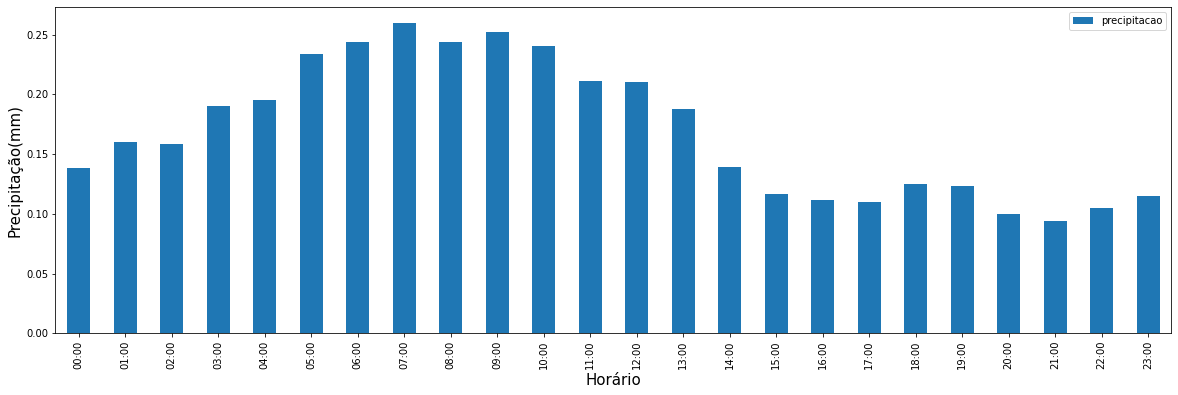

In [247]:
dados_natal_hora_media.plot.bar(stacked=True, figsize=(20,6))
plt.xlabel("Horário", fontsize = 15)
plt.ylabel("Precipitação(mm)", fontsize = 15)
plt.show(True)  

Com esse gráfico de barras, conseguimos verificar os horários que tem a maior média de chuvas são entre 5:00 e 9:00. Já a menor média de precipitação está entre 20:00 e 23:00.

Abaixo, vamos criar um dataframe com informações binárias de precipitação. Se não choveu, atribuimos o próprio zero, se choveu, atribuimos o numero um. Nisso, faremos uma função de agregação para saber quais horários teve mais registros de qualquer volume de chuvas.

In [248]:
dados_precipitacao_binario = dados_natal["precipitacao"].mask(dados_natal["precipitacao"] > 0, 1)

In [249]:
dados_natal_binario = dados_natal.iloc[0: , 0:2]

dados_natal_binario = dados_natal_binario.assign(dados_precipitacao_b= dados_precipitacao_binario.values)
dados_natal_binario


,data,hora,dados_precipitacao_b
0,2011-01-01,00:00,0.0
1,2011-01-01,01:00,0.0
2,2011-01-01,02:00,0.0
3,2011-01-01,03:00,1.0
4,2011-01-01,04:00,0.0
...,...,...,...
99307,2022-04-30,19:00,0.0
99308,2022-04-30,20:00,0.0
99309,2022-04-30,21:00,0.0
99310,2022-04-30,22:00,0.0


In [250]:
dados_natal_precipitacao_binario = dados_natal_binario.groupby("hora").sum()

In [251]:
dados_natal_precipitacao_binario

,dados_precipitacao_b
hora,
00:00,249.0
01:00,268.0
02:00,291.0
03:00,334.0
04:00,333.0
05:00,402.0
06:00,416.0
07:00,378.0
08:00,398.0


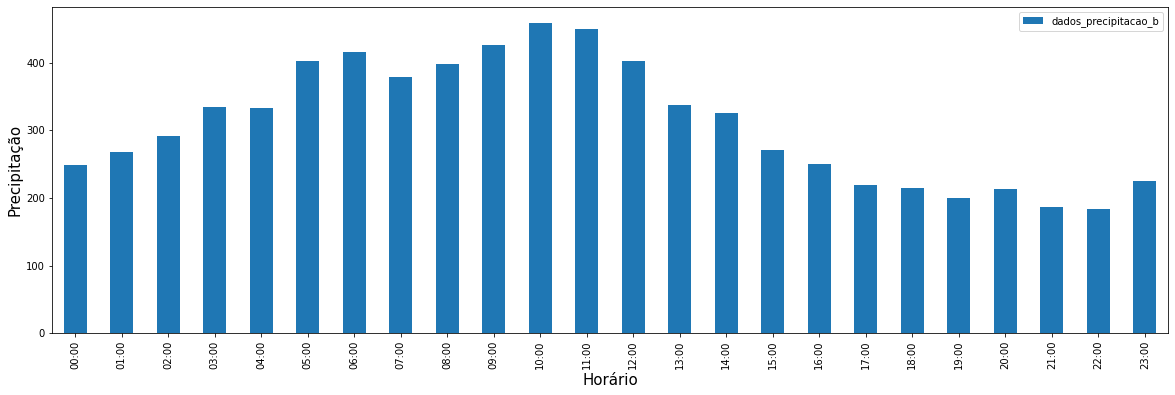

In [252]:
dados_natal_precipitacao_binario.plot.bar(stacked=True, figsize=(20,6))
plt.xlabel("Horário", fontsize = 15)
plt.ylabel("Precipitação", fontsize = 15)
plt.show(True)   

Acima, verificamos que a maior incidencia de algum volume de chuva aconteceu entre 10:00 e 11:00, já a menor incidencia foi entre 21:00 e 22:00. 

Com a análise dos dois gráficos acima, verificamos que o melhor horário para se fazer algo sem ser atrapalhado pela chuva, está entre 21:00 e 22:00 ⛈ 😝

Agora bateu a curiosidade de saber qual o mês mais chuvoso de Natal. Vamos para a análise...

In [253]:
dados_natal_mes_ = dados_natal['data'].dt.month
dados_natal_mes_precipitacao =  dados_natal['precipitacao']

df_inner = dados_natal_mes_.to_frame().merge(dados_natal_mes_precipitacao, how='inner', left_index=True, right_index=True)
df_inner

,data,precipitacao
0,1,0.0
1,1,0.0
2,1,0.0
3,1,0.4
4,1,0.0
...,...,...
99307,4,0.0
99308,4,0.0
99309,4,0.0
99310,4,0.0


Text(0, 0.5, 'Precipitação(mm)')

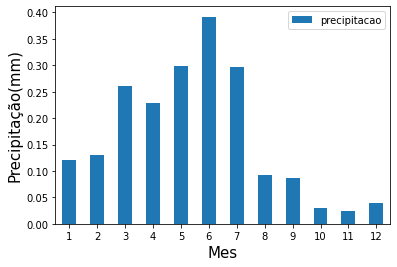

In [254]:
dados_natal_precipitacao_mes = df_inner.groupby("data").mean()
dados_natal_precipitacao_mes

dados_natal_precipitacao_mes.plot.bar(rot=0)
plt.xlabel("Mes", fontsize = 15)
plt.ylabel("Precipitação(mm)", fontsize = 15)

Como cidadão natalense,eu já esperava que o mês de junho seria o mais chuvoso. Junho é a passagem do outono para o inverno. O período menos chuvoso se dá entre outubro e novembro. 

In [255]:
dados_natal_ano_ = dados_natal['data'].dt.year
dados_natal_ano_precipitacao =  dados_natal['precipitacao']

df_inner2 = dados_natal_ano_.to_frame().merge(dados_natal_ano_precipitacao, how='inner', left_index=True, right_index=True)

dados_natal_precipitacao_ano = df_inner2.groupby("data").sum()
dados_natal_precipitacao_ano



,precipitacao
data,
2011,1812.8
2012,1119.2
2013,1682.0
2014,1621.4
2015,1284.4
2016,999.4
2017,1230.8
2018,931.6
2019,1659.0


Text(0, 0.5, 'Precipitação(mm)')

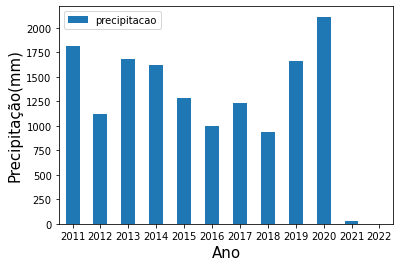

In [256]:
dados_natal_precipitacao_ano.plot.bar(rot=0)
plt.xlabel("Ano", fontsize = 15)
plt.ylabel("Precipitação(mm)", fontsize = 15)

O ano mais chuvoso de 2011 para cá em Natal foi o ano de 2020. Como morador de Natal/RN, sei que 2021 não choveu tão pouco, e sei que 2022 choveu mais que 0 mm. Portanto, não podemos analisar os anos de 2021 e 2022 com tantos dados faltando. 

# **Analise por dia**

Para efeito visualizar os dados de uma outra perspectiva, vamos organizar analisar os dados pelos dias, e não mais pela hora. Para isto, usamos um groupby() e o sum().


In [257]:
dados_natal_dia = dados_natal.groupby("data").sum()
dados_natal_dia


,precipitacao
data,
2011-01-01,0.4
2011-01-02,0.0
2011-01-03,0.0
2011-01-04,3.0
2011-01-05,10.6
...,...
2022-04-26,0.0
2022-04-27,0.0
2022-04-28,0.0


In [258]:
dados_natal_dia.describe()

,precipitacao
count,4012.000000
mean,3.609920
std,11.295534
min,0.000000
25%,0.000000
50%,0.000000
75%,1.400000
max,152.400000


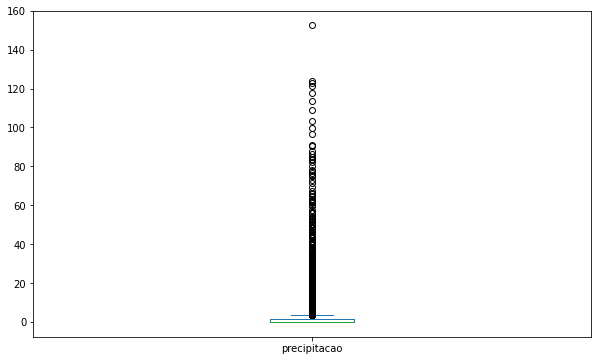

In [259]:
dados_natal_dia.plot(kind='box', figsize=(10,6),subplots=True);

In [260]:
dia_mais_chuvoso = dados_natal_dia.loc[dados_natal_dia['precipitacao'] == 152.400000]
dia_mais_chuvoso

,precipitacao
data,
2014-06-15,152.4


Analisar a precipitação pelos dias se tornou bem mais interessante do que analisar por hora. Como nossa **mediana** deu 0, podemos dizer que nesse período analisado, tivemos mais registros de dias sem chuvas de que com chuvas. A análise também nos permitiu verificar que o maior nível de chuva foi registrado no dia 15/06/2014.

O **histograma** abaixo mostra a frequencia de chuvas durante o período analisado, e permite-nos ver que a imensa maioria dos dias em Natal/RN tem nenhuma chuva ou apenas chuvas leves.

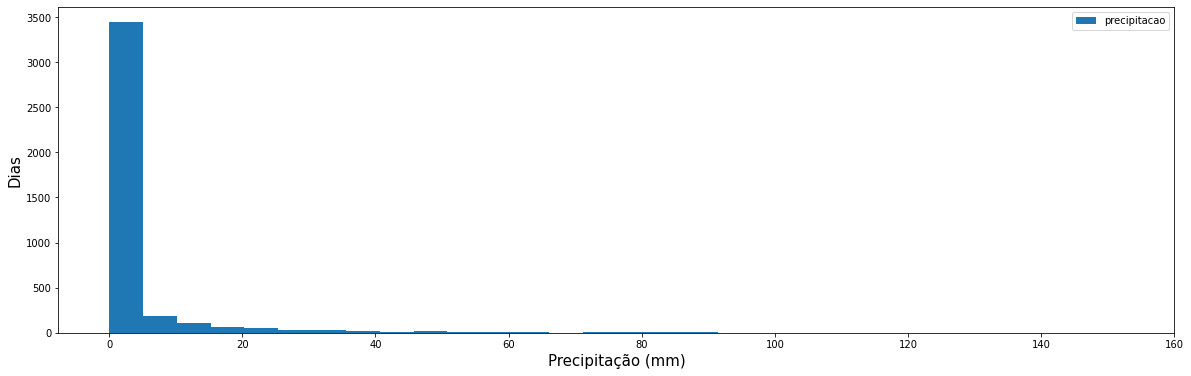

In [261]:
dados_natal_dia.plot.hist(bins=30, figsize=(20,6))
plt.xlabel("Precipitação (mm)", fontsize = 15)
plt.ylabel("Dias", fontsize = 15)
plt.show(True)  

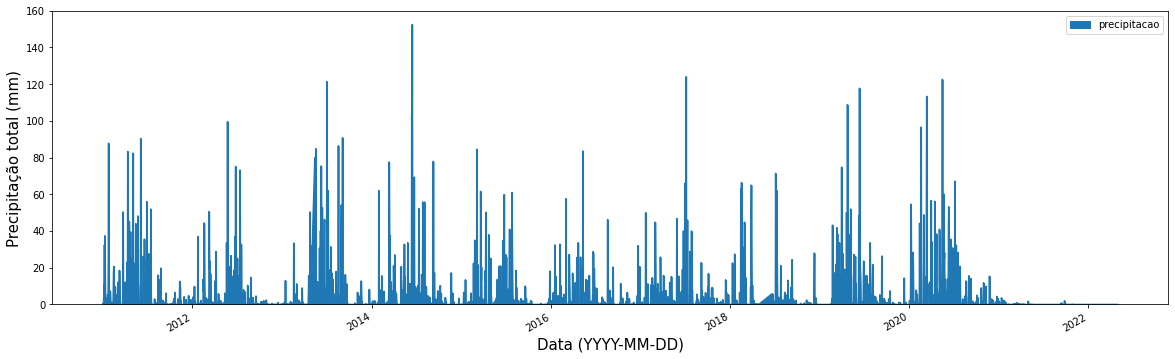

In [262]:
dados_natal_dia.plot.area(figsize=(20,6), subplots=True)
plt.xlabel("Data (YYYY-MM-DD)", fontsize = 15)
plt.ylabel("Precipitação total (mm)", fontsize = 15)
plt.show(True)  

O gráfico acima, mostra que se trata de uma série temporal. Vamos analisar se há sazonalidade e tendencia nessa série.

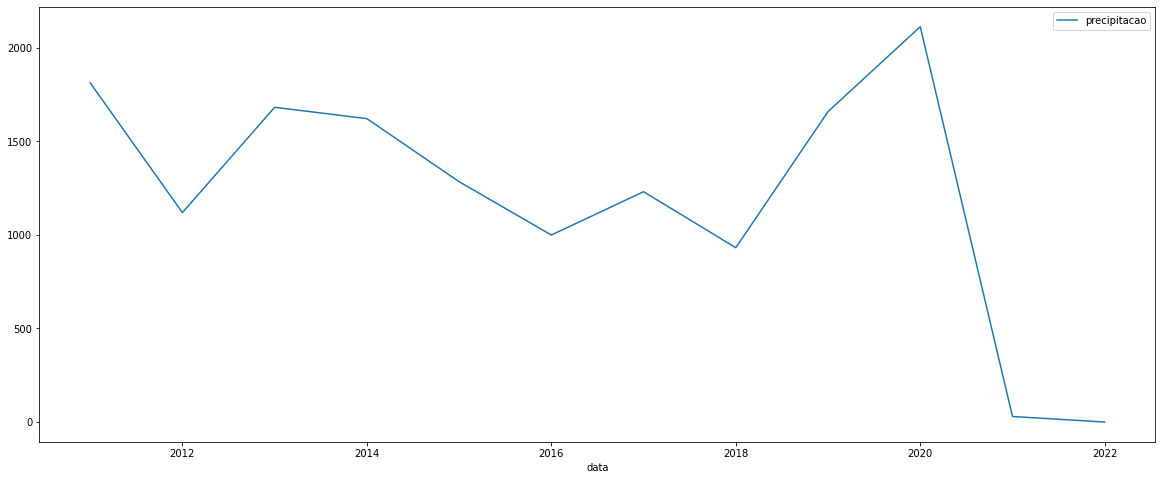

In [263]:
dados_natal_dia.groupby(dados_natal_dia.index.year).sum().plot(figsize=(20, 8))

In [264]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultado = seasonal_decompose(dados_natal_dia['precipitacao'], freq=365)

# obtendo componentes
tendencia = resultado.trend
sazonalidade = resultado.seasonal
residuo = resultado.resid

Text(0.5, 1.0, 'Tendência')

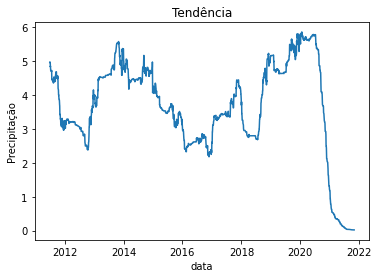

In [265]:
plt.plot(tendencia)
plt.xlabel('data')
plt.ylabel('Precipitação')
plt.title('Tendência')

Podemos inferir que tem uma tendência ciclica. 

Text(0.5, 1.0, 'Sazonalidade')

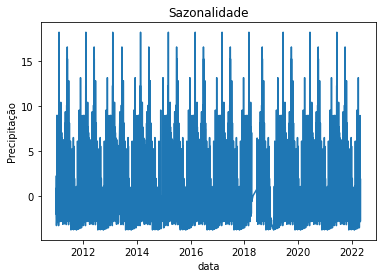

In [266]:
plt.plot(sazonalidade)
plt.xlabel('data')
plt.ylabel('Precipitação')
plt.title('Sazonalidade')

Text(0.5, 1.0, 'Residuo')

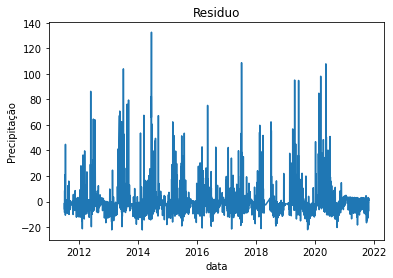

In [267]:
plt.plot(residuo)
plt.xlabel('data')
plt.ylabel('Precipitação')
plt.title('Residuo')